
<h1>Определение закономерностей, определяющие успешность игры<span 
class="tocSkip"></span></h1>

# План проекта: #

1. [Изучение общих данных](#cell1)
2. [Подготовка данных](#cell2)
3. [Исследовательский анализ данных](#cell3)
4. [Портрет пользователя каждого региона](#cell4)
5. [Проверка гипотез](#cell5)
6. [Общий вывод](#cell6)

**Описание проекта**

Вы работаете в интернет-магазине «Стримчик», который продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Вам нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.
Перед вами данные до 2016 года. Представим, что сейчас декабрь 2016 г., и вы планируете кампанию на 2017-й. Нужно отработать принцип работы с данными. Неважно, прогнозируете ли вы продажи на 2017 год по данным 2016-го или же 2027-й — по данным 2026 года.
В наборе данных попадается аббревиатура ESRB (Entertainment Software Rating Board) — это ассоциация, определяющая возрастной рейтинг компьютерных игр. ESRB оценивает игровой контент и присваивает ему подходящую возрастную категорию, например, «Для взрослых», «Для детей младшего возраста» или «Для подростков».

## Изучение общих данных
<a id='cell1'></a>

Импортируем различные библиотеки:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
from scipy import stats as st
import copy

Прочитаем приложенный файл и сохраним в переменную:

In [2]:
data = pd.read_csv('/datasets/games.csv')

Получение первых строк таблицы:

In [3]:
data.head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


Общая информация о данных таблицы:

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
Name               16713 non-null object
Platform           16715 non-null object
Year_of_Release    16446 non-null float64
Genre              16713 non-null object
NA_sales           16715 non-null float64
EU_sales           16715 non-null float64
JP_sales           16715 non-null float64
Other_sales        16715 non-null float64
Critic_Score       8137 non-null float64
User_Score         10014 non-null object
Rating             9949 non-null object
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


**Описание данных**

- Name — название игры
- Platform — платформа
- Year_of_Release — год выпуска
- Genre — жанр игры
- NA_sales — продажи в Северной Америке (миллионы проданных копий)
- EU_sales — продажи в Европе (миллионы проданных копий)
- JP_sales — продажи в Японии (миллионы проданных копий)
- Other_sales — продажи в других странах (миллионы проданных копий)
- Critic_Score — оценка критиков (максимум 100)
- User_Score — оценка пользователей (максимум 10)
- Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.


## Подготовка данных
<a id='cell2'></a>

Проверим данные на наличие пропусков:

In [5]:
data.isnull().sum()

Name                  2
Platform              0
Year_of_Release     269
Genre                 2
NA_sales              0
EU_sales              0
JP_sales              0
Other_sales           0
Critic_Score       8578
User_Score         6701
Rating             6766
dtype: int64

Изменим название столбцов(приведём к нижнему регистру):

In [6]:
data.columns = data.columns.str.lower()

Найдем строки с пропусками в полях 'name', 'genre':

In [7]:
data[data['name'].isna()].head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


Их количество очень не значительное и не сможет сильно повлиять на результат наших данных, поэтому удалим стороки с пустыми значениями:

In [8]:
data = data.dropna(subset=['name'], axis=0)

Посмотрим уникальные значения столбца 'user_score':

In [9]:
data['user_score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

Помимо пропусков присутствуют значения - 'tbd':

In [10]:
data[data['user_score'] == 'tbd']

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
119,Zumba Fitness,Wii,2010.0,Sports,3.45,2.59,0.0,0.66,NaN,tbd,E
301,Namco Museum: 50th Anniversary,PS2,2005.0,Misc,2.08,1.35,0.0,0.54,61.0,tbd,E10+
520,Zumba Fitness 2,Wii,2011.0,Sports,1.51,1.03,0.0,0.27,NaN,tbd,T
645,uDraw Studio,Wii,2010.0,Misc,1.65,0.57,0.0,0.20,71.0,tbd,E
657,Frogger's Adventures: Temple of the Frog,GBA,NaN,Adventure,2.15,0.18,0.0,0.07,73.0,tbd,E
...,...,...,...,...,...,...,...,...,...,...,...
16695,Planet Monsters,GBA,2001.0,Action,0.01,0.00,0.0,0.00,67.0,tbd,E
16697,Bust-A-Move 3000,GC,2003.0,Puzzle,0.01,0.00,0.0,0.00,53.0,tbd,E
16698,Mega Brain Boost,DS,2008.0,Puzzle,0.01,0.00,0.0,0.00,48.0,tbd,E
16704,Plushees,DS,2008.0,Simulation,0.01,0.00,0.0,0.00,NaN,tbd,E


Таких значений в таблице - 2424. 'tbd' - аббревиатура, 'to be determined', что означает - предстоит определить. Получается, оценка пользователей ещё не определена, и эти значения можно определить как отсутствие данных('NaN'):

In [11]:
data['user_score'] = data['user_score'].replace('tbd', np.NaN)

Заполним пропуски в столбцах 'critic_score' и 'user_score'. Оценка пользователей и оценка критиков ещё не определена, поэтому заполним пропуски значениями '-1':

In [12]:
data['critic_score'] = data['critic_score'].fillna(-1)
data['user_score'] = data['user_score'].fillna(-1)

Заполним пропуски в столбце 'year_of_release' медианой по столбцу:

In [13]:
data['year_of_release'] = data['year_of_release'].fillna(1979)

Посчитаем суммарные продажи во всех регионах и запишем их в отдельный столбец:

In [14]:
data['sum_sales'] = data['na_sales'] + data['eu_sales'] + data['jp_sales'] + data['other_sales']

Преобразуем данные в нужные типы:

In [15]:
data['year_of_release'] = pd.to_datetime(data['year_of_release'], format='%Y')
data['critic_score'] = data['critic_score'].astype('int')
data['user_score'] = data['user_score'].astype('float64')
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16713 entries, 0 to 16714
Data columns (total 12 columns):
name               16713 non-null object
platform           16713 non-null object
year_of_release    16713 non-null datetime64[ns]
genre              16713 non-null object
na_sales           16713 non-null float64
eu_sales           16713 non-null float64
jp_sales           16713 non-null float64
other_sales        16713 non-null float64
critic_score       16713 non-null int64
user_score         16713 non-null float64
rating             9949 non-null object
sum_sales          16713 non-null float64
dtypes: datetime64[ns](1), float64(6), int64(1), object(4)
memory usage: 1.7+ MB


Рассмотрим более подробно столбец 'rating':

In [16]:
data['rating'].unique()

array(['E', nan, 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'], dtype=object)

Entertainment Software Rating Board (ESRB) — негосударственная организация, основное направление деятельности — принятие и определение рейтингов для компьютерных видеоигр и другого развлекательного программного обеспечения в США и Канаде.

- 'E': 'Для всех'
- 'M': 'Для взрослых'
- 'T': 'Подросткам от 13 лет'
- 'E10+': 'Для всех от 10 лет и старше'
- 'K-A': 'Для всех(устар.)'
- 'AO': 'Только для взрослых'
- 'EC': 'Для детей младшего возраста'
- 'RP': 'Рейтинг ожидается'

Изменим рейтинг - 'RP': 'Рейтинг ожидается' на - NaN(тк данные отсутствуют) и рейтинг - 'K-A': 'Для всех(устар.)' на - 'E': 'Для всех':

In [17]:
data['rating'] = data['rating'].replace('RP', np.NaN)
data['rating'] = data['rating'].replace('K-A', 'E')

Заполним пропуски в столбце 'rating' значением - 'undefined':

In [18]:
data['rating'] = data['rating'].fillna('undefined')

Создадим дополнительный столбец в таблице для дальнейших расчётов:

In [19]:
#создадим дополнительный столбец
def esrb_ratings(row):
    name = row['rating']
    if name == 'E':
        return 'Для всех'
    elif name == 'M':
        return 'Для взрослых'
    elif name == 'T':
        return 'Подросткам от 13 лет'
    elif name == 'E10+':
        return 'Для всех от 10 лет и старше'
    elif name == 'AO':
        return 'Только для взрослых'
    elif name == 'EC':
        return 'Для детей младшего возраста'
    elif name == 'undefined':
        return 'Рейтинг не определен'

data['esrb_raiting'] = data.apply(esrb_ratings, axis = 1)

Данные после обработки:

In [20]:
data.isnull().sum()

name               0
platform           0
year_of_release    0
genre              0
na_sales           0
eu_sales           0
jp_sales           0
other_sales        0
critic_score       0
user_score         0
rating             0
sum_sales          0
esrb_raiting       0
dtype: int64

## Исследовательский анализ данных
<a id='cell3'></a>

Посмотрим, сколько игр выпускалось в разные годы:

/opt/conda/lib/python3.7/site-packages/pandas/plotting/_matplotlib/converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


Text(0, 0.5, 'Частота')

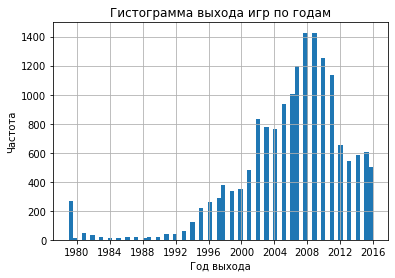

In [21]:
data['year_of_release'].hist(alpha=1, bins=70)
plt.title('Гистограмма выхода игр по годам')
plt.xlabel('Год выхода')
plt.ylabel('Частота')

До 1992 года игры практически не выпускались, скорее всего причиной было - отсутствие техники(платформ) для игр. После появления оборудования пошёл активный рост выпуска игр, с пиковыми показателями в 2008-09 годах. Далее последовало снижение, в связи с появлением других всевозможных увлечений.

Выберем топ платформ, по которым были самые большие суммарные продажи игр за весь рассматриваемый период:

Text(0, 0.5, 'Название платформы')

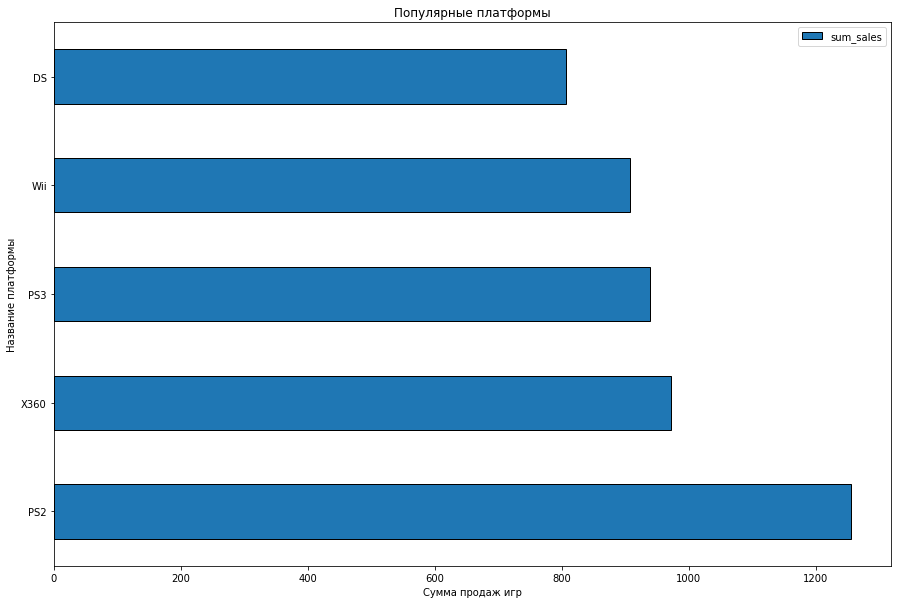

In [22]:
total_data = data.copy()
#data_platform = total_data.set_index('platform')


#print(total_platform)
total_platform = total_data.groupby('platform')['sum_sales'].sum().to_frame('sum_sales').sort_values(by='sum_sales', ascending=False).head()
total_platform.head().plot(kind='barh', figsize = (15,10), ec='black')
plt.title('Популярные платформы')
plt.xlabel('Сумма продаж игр')
plt.ylabel('Название платформы')

Топ платформ, с самыми большими продажами игр: PS2, X360, PS3, Wii, DS

Определим среднюю продолжительность жизни платформ:

Количество игр по годам:

In [23]:
timegame = total_data.pivot_table(index='year_of_release', columns='platform', values='name', aggfunc='count')
timegame.fillna(0, inplace=True)
timegame

platform,2600,3DO,3DS,DC,DS,GB,GBA,GC,GEN,GG,...,SAT,SCD,SNES,TG16,WS,Wii,WiiU,X360,XB,XOne
year_of_release,,,,,,,,,,,,,,,,,,,,,
1979-01-01,17.0,0.0,8.0,0.0,30.0,1.0,11.0,14.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,34.0,0.0,30.0,21.0,0.0
1980-01-01,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1981-01-01,46.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1982-01-01,36.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1983-01-01,11.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1984-01-01,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1985-01-01,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1986-01-01,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1987-01-01,6.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Определим топ 7:

In [24]:
top7 = data.pivot_table(index='platform', values='sum_sales', aggfunc='sum').nlargest(7, 'sum_sales')
top7

,sum_sales
platform,
PS2,1255.77
X360,971.42
PS3,939.65
Wii,907.51
DS,806.12
PS,730.86
GBA,317.85


Построим график:

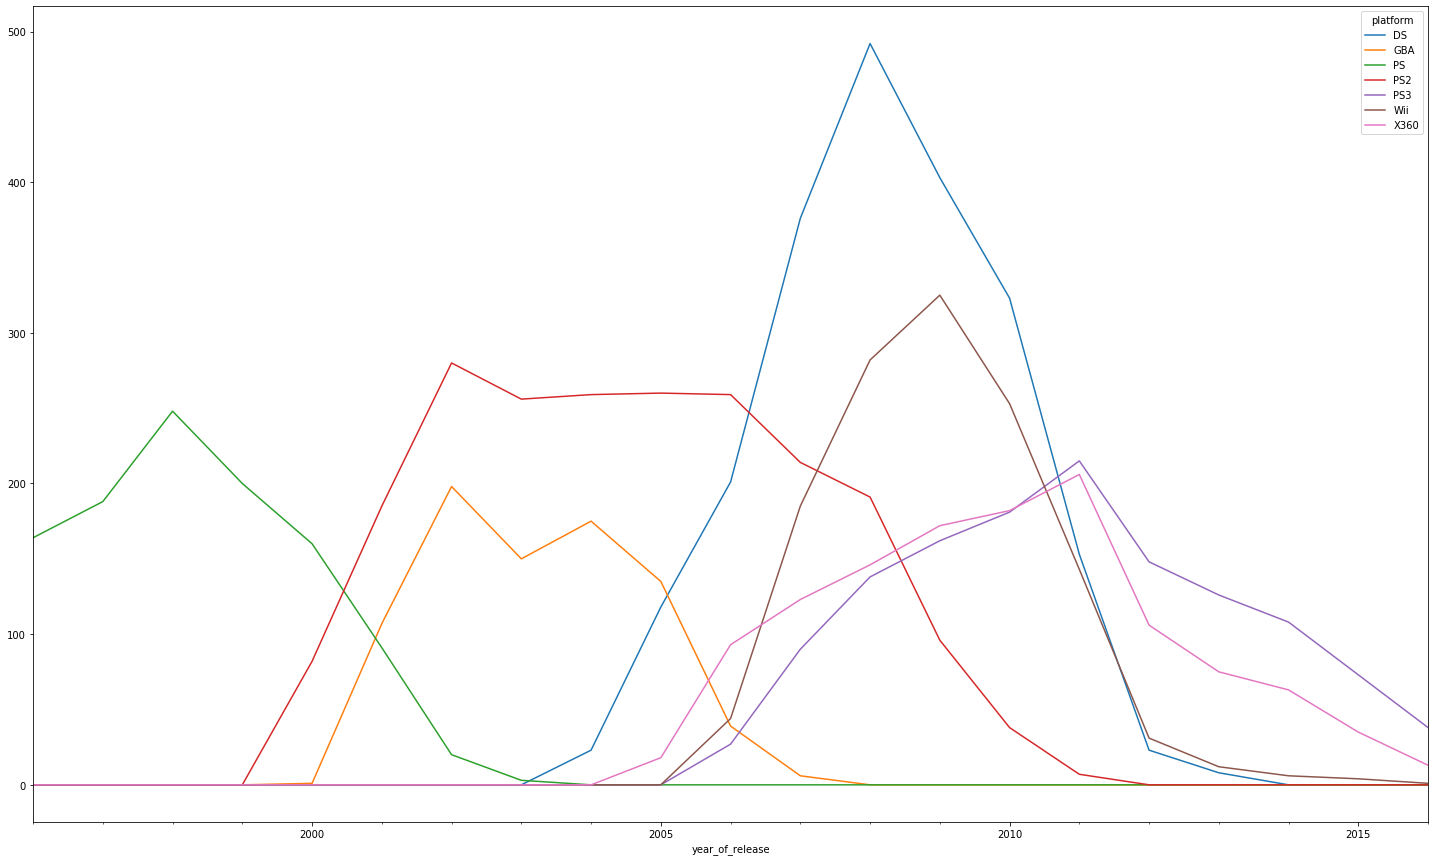

In [25]:
for platform in timegame.columns:
    if platform not in top7.index:
        timegame.drop(platform, axis=1, inplace=True)
timegame = timegame[timegame.index >= '1996']
timegame
timegame.plot(figsize = (25,15))

- DS - с 2003 года до 2014, примерно 11 лет;
- GBA - с 2000 года до 2008, примерно 8 лет;
- PS - с 1996 года до 2004, примерно 8 лет;
- PS2 - с 1999 до 2012, примерно 13 лет;
- PS3 - с 2005 по настоящее время;
- Wii - с 2005 по настоящее время;
- X360 - с 2004 по настоящее время;


В среднем консоль живет около 10 лет. Причина не очень продолжительной жизни - развитие технологий. Постоянно обновляются различные комплектующие для платформ, постоянно выходят новые игры. Все это заставляет производителей обновлять линейку платформ.

Далее, определим актуальный период для анализа - 6 лет(с 2010 по 2016 года). Эти данные помогут сделать выводы и построить прогноз на 2017 год:

In [26]:
total_data1 = total_data
total_data = total_data.query('year_of_release >= 2010')

In [27]:
timegamesale = total_data.pivot_table(index='year_of_release', columns='platform', values='sum_sales', aggfunc='sum')
timegamesale.fillna(0, inplace=True)
timegamesale = timegamesale.query('year_of_release >= 2010')
timegamesale

platform,3DS,DS,PC,PS2,PS3,PS4,PSP,PSV,Wii,WiiU,X360,XOne
year_of_release,,,,,,,,,,,,
2010-01-01,0.00,85.02,24.28,5.64,142.17,0.00,35.04,0.00,127.95,0.00,170.03,0.00
2011-01-01,63.20,26.18,35.03,0.45,156.78,0.00,17.82,4.63,59.65,0.00,143.84,0.00
2012-01-01,51.36,11.01,23.22,0.00,107.36,0.00,7.69,16.19,21.71,17.56,99.74,0.00
2013-01-01,56.57,1.54,12.38,0.00,113.25,25.99,3.14,10.59,8.59,21.65,88.58,18.96
2014-01-01,43.76,0.00,13.28,0.00,47.76,100.00,0.24,11.90,3.75,22.03,34.74,54.07
2015-01-01,27.78,0.00,8.52,0.00,16.82,118.90,0.12,6.25,1.14,16.35,11.96,60.14
2016-01-01,15.14,0.00,5.25,0.00,3.60,69.25,0.00,4.25,0.18,4.60,1.52,26.15


In [28]:
top8 = total_data.pivot_table(index='platform', values='sum_sales', aggfunc='sum').nlargest(8, 'sum_sales')
top8

,sum_sales
platform,
PS3,587.74
X360,550.41
PS4,314.14
3DS,257.81
Wii,222.97
XOne,159.32
DS,123.75
PC,121.96


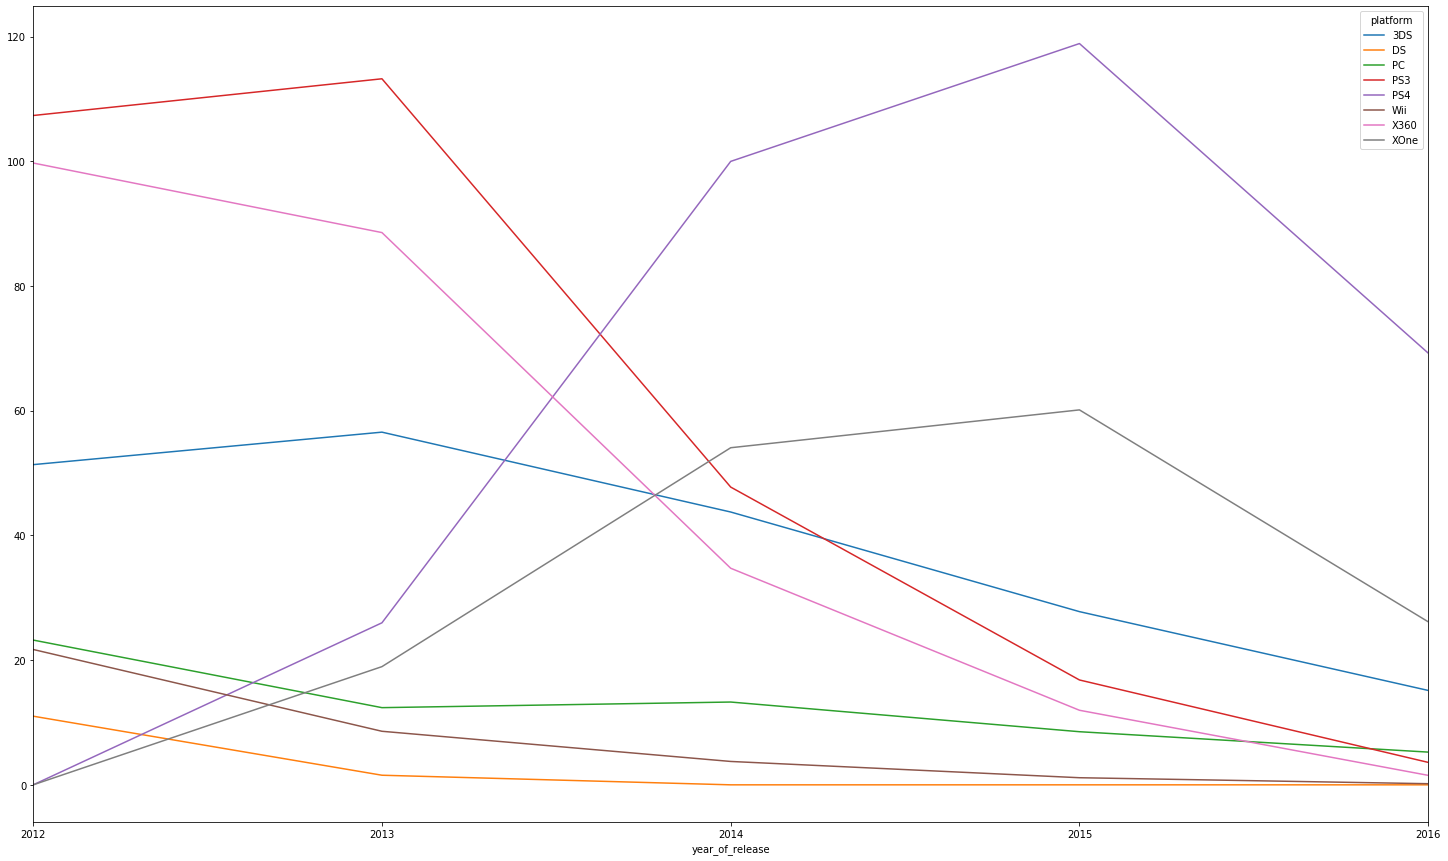

In [29]:
for platform in timegamesale.columns:
    if platform not in top8.index:
        timegamesale.drop(platform, axis=1, inplace=True)
timegamesale = timegamesale[timegamesale.index >= '2012']
timegamesale
timegamesale.plot(figsize = (25,15))

На 2016 год лидеры по объемам продаж: PS4 и XOne. Если строить планы на 2017 год, необходимо чтобы игры на данные платформы всегда были в наличии.

Платформы и суммы их продаж в различных регионах мира

In [30]:
max_data = total_data.pivot_table(index='platform', values=['na_sales', 'eu_sales', 'jp_sales', 'other_sales', 'sum_sales'], aggfunc = ['sum'])
max_data.reset_index()

platform      sum                                        
            eu_sales jp_sales na_sales other_sales sum_sales
0       3DS    61.27   100.62    82.65       13.27    257.81
1        DS    28.06    27.90    59.66        8.13    123.75
2        PC    68.82     0.00    39.07       14.07    121.96
3       PS2     1.67     0.80     2.32        1.30      6.09
4       PS3   213.60    59.26   229.25       85.63    587.74
5       PS4   141.09    15.96   108.74       48.35    314.14
6       PSP     7.59    42.20     9.65        4.61     64.05
7       PSV    13.07    21.84    12.47        6.43     53.81
8       Wii    65.91    17.75   121.20       18.11    222.97
9      WiiU    25.13    13.01    38.10        5.95     82.19
10     X360   163.41     5.46   334.18       47.36    550.41
11     XOne    51.59     0.34    93.12       14.27    159.32

Построим график «ящик с усами» по глобальным продажам игр в разбивке по платформам:

count    5277.000000
mean        0.482138
std         1.235982
min         0.010000
25%         0.040000
50%         0.130000
75%         0.400000
max        21.820000
Name: sum_sales, dtype: float64

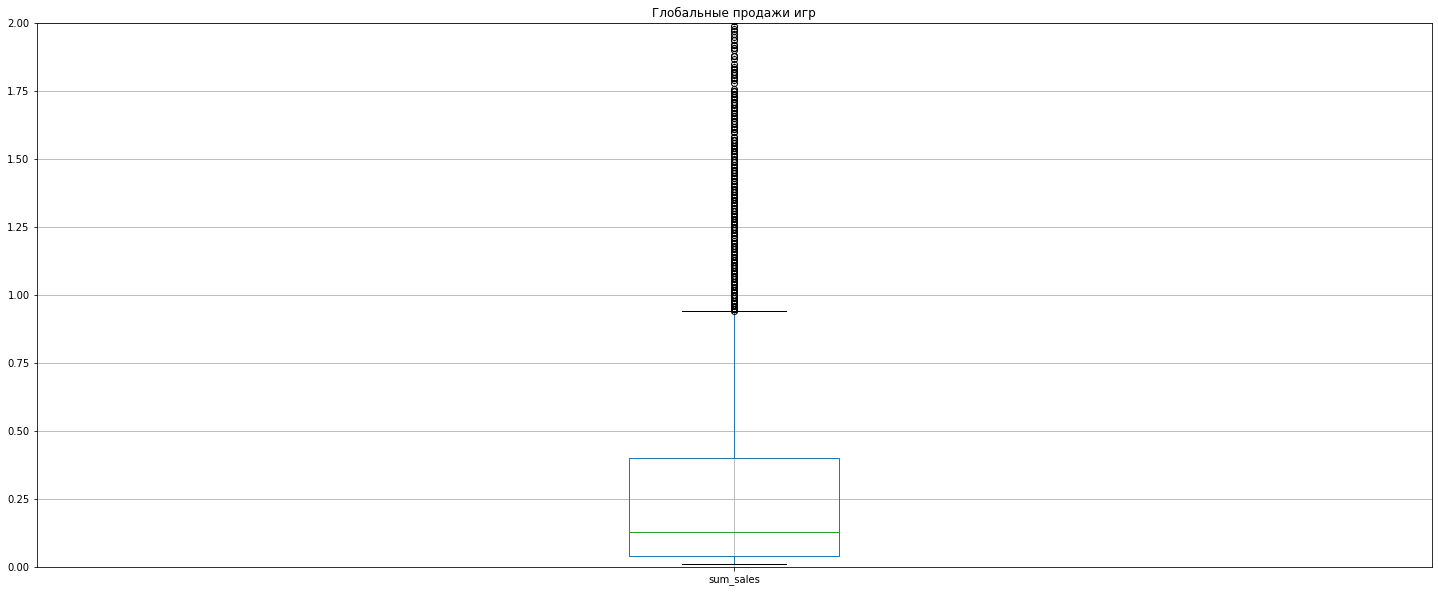

In [31]:
total_data.boxplot(column='sum_sales', figsize=(25,10))
plt.ylim(0, 2)
plt.title('Глобальные продажи игр')
total_data['sum_sales'].describe()

Средние продажи игр составляют около 0,4 млн. долларов. Медиана - 0,15 млн. долларов. Верхняя граница предела, за которыми уже определяются аномалии - около 0,95 млн. долларов.

/opt/conda/lib/python3.7/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


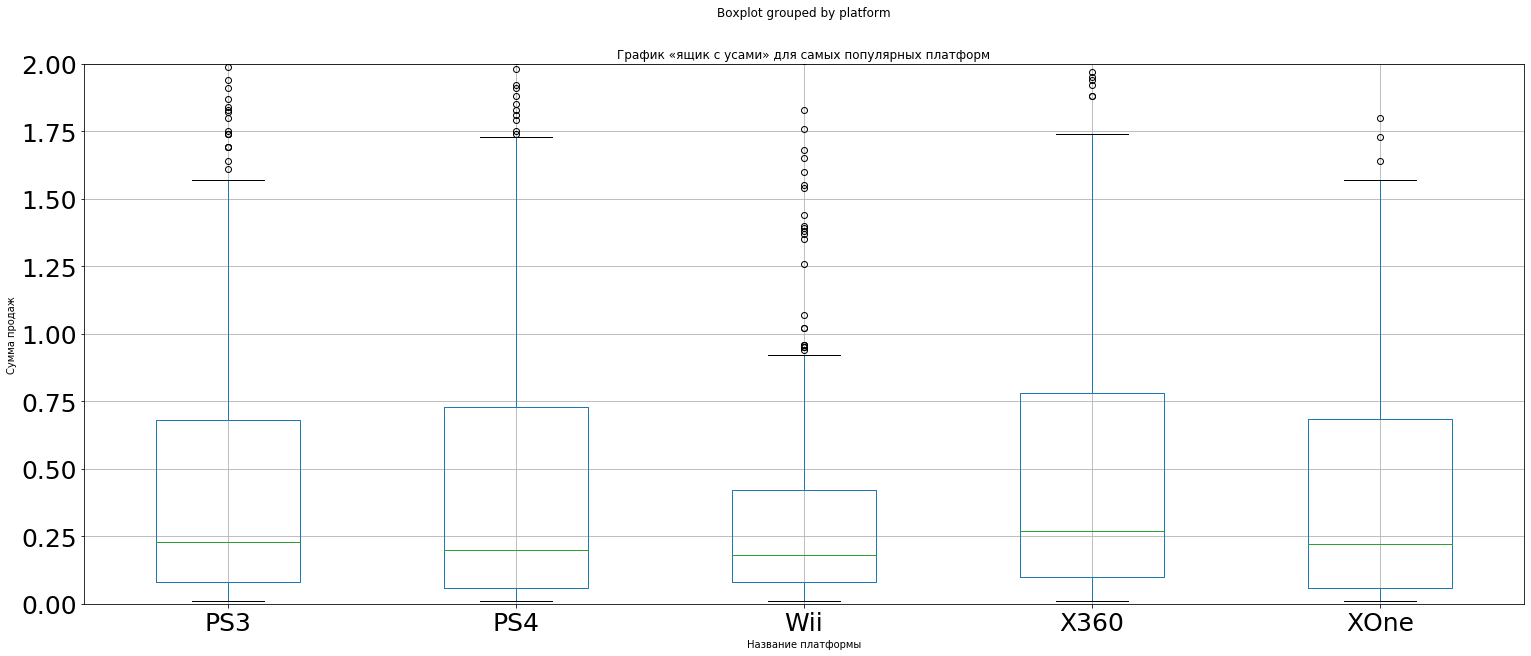

In [32]:
total_platform = total_data.query('platform == "PS4" or platform == "X360" or platform == "PS3" or platform == "Wii" or platform == "XOne"')
total_platform.boxplot(column='sum_sales', by='platform', fontsize=25, figsize=(25,10))
plt.ylim(0, 2)
plt.title('График «ящик с усами» для самых популярных платформ')
plt.xlabel('Название платформы')
plt.ylabel('Сумма продаж')
plt.show()

Показатели:
- Верхняя граница: "X360" - около 1.75, "PS3" - около 1.55, "PS4" - около 1.75, "Wii" - около 0.9, "XOne" - около 1.55.
- Медиана: "X360" - около 0.25, "PS3" - около 0.25, "PS4" - около 0.2, "Wii" - около 0.15, "XOne" - около 0.25.
- Среди лидеров: платформы "X360", "XOne", "PS4" и "PS3".
- Среди аутсайдеров: платформа "Wii".

Посмотрим, как влияют на продажи внутри одной популярной платформы оценки пользователей и критиков на примере X360: 

Диаграмму рассеяния и корреляция между оценками и продажами:

0.2813138469777321

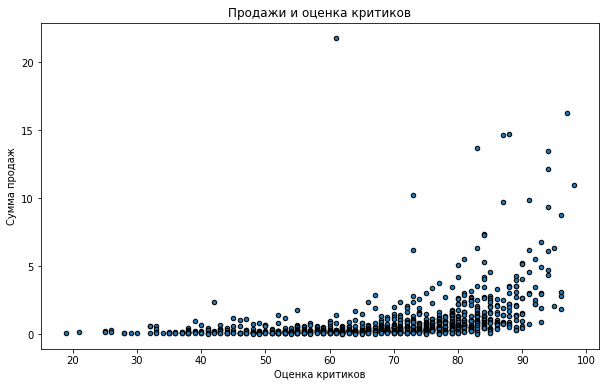

In [33]:
X360 = total_data1[(total_data1['platform'] == 'X360') & (total_data1['critic_score'] > 0)].copy()
X360.plot(kind='scatter', x='critic_score', y='sum_sales', ec='black', figsize=(10,6))
plt.title('Продажи и оценка критиков')
plt.xlabel('Оценка критиков')
plt.ylabel('Сумма продаж')
total_data['critic_score'].corr(total_data['sum_sales'])

0.2255385973780669

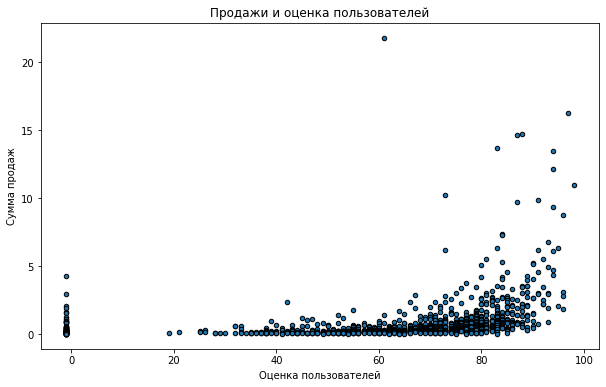

In [34]:
X360 = total_data1[(total_data1['platform'] == 'X360') & (total_data1['user_score'] > 0)].copy()
X360.plot(kind='scatter', x='critic_score', y='sum_sales', ec='black', figsize=(10,6))
plt.title('Продажи и оценка пользователей')
plt.xlabel('Оценка пользователей')
plt.ylabel('Сумма продаж')
total_data['user_score'].corr(total_data['sum_sales'])

Прямой связи между оценками и продажами нет, присутсвует небольшая закономерность. Данная закономерность относится ко всем играм, так как пользователи перед выбором игры, читают отзывы о игре и смотрят её рейтинг.

Посмотрите на общее распределение игр по жанрам. Что можно сказать о самых прибыльных жанрах? Выделяются ли жанры с высокими и низкими продажами?

              sum_amount  count_amount
genre                                 
Action           1744.17          3369
Sports           1331.27          2348
Shooter          1052.45          1323
Role-Playing      934.56          1498
Platform          827.77           888
Misc              802.51          1750
Racing            728.67          1249
Fighting          447.53           849
Simulation        389.97           873
Puzzle            242.57           580
Adventure         237.59          1303
Strategy          174.23           683


Text(0, 0.5, 'Количиство')

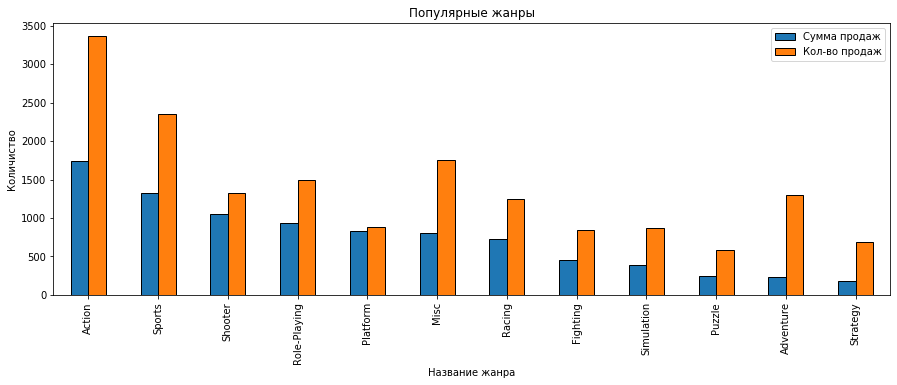

In [35]:
genre_group = data.pivot_table(index=['genre'], values='sum_sales', aggfunc=['sum', 'count'])
genre_group.reset_index()
genre_group.columns = ['sum_amount', 'count_amount']
print(genre_group.sort_values('sum_amount', ascending=False))
genre_group.sort_values('sum_amount', ascending=False).plot(kind='bar', figsize=(15,5), ec='black')
plt.title('Популярные жанры')
plt.legend(['Сумма продаж', 'Кол-во продаж'])
plt.xlabel('Название жанра')
plt.ylabel('Количиство')


Самые популярные жанры: Action, Sports, Shooter. Они являются лидерами как по сумме продаж, так и по количеству. Также присутствуют жанры с большим количеством продаж и небольшой суммой продаж, это жанр Misc и Adventure, скорее всего стоимость игр в данных жанрах дешевле, по сравнению с аналогами.

                  mean  median
genre                         
Platform      0.932173    0.27
Shooter       0.795503    0.24
Role-Playing  0.623872    0.18
Racing        0.583403    0.19
Sports        0.566980    0.22
Fighting      0.527126    0.21
Action        0.517711    0.19
Misc          0.458577    0.16
Simulation    0.446701    0.15
Puzzle        0.418224    0.11
Strategy      0.255095    0.10
Adventure     0.182341    0.05


Text(0, 0.5, 'Количиство')

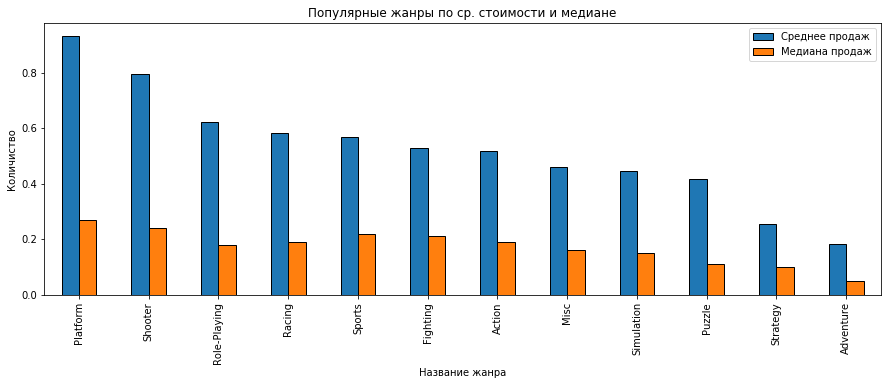

In [36]:
genre_group = data.pivot_table(index=['genre'], values='sum_sales', aggfunc=['mean', 'median'])
genre_group.reset_index()
genre_group.columns = ['mean', 'median']
print(genre_group.sort_values('mean', ascending=False))
genre_group.sort_values('mean', ascending=False).plot(kind='bar', figsize=(15,5), ec='black')
plt.title('Популярные жанры по ср. стоимости и медиане')
plt.legend(['Среднее продаж', 'Медиана продаж'])
plt.xlabel('Название жанра')
plt.ylabel('Количиство')

По средней стоимости и медиане суммы продаж самые популярные жанры: Platform, Shooter, Role-Playing. 

## Портрет пользователя каждого региона
<a id='cell4'></a>

Самые популярные платформы (топ-5) каждого региона (NA, EU, JP):

In [37]:
# Популярные платформы в Северной Америке
na_total = total_data.pivot_table(index=['platform'], values=['na_sales'], aggfunc=['sum'])
na_total.reset_index()
na_total.columns = ['na_sales']
na_total = na_total.sort_values(by='na_sales', ascending=False).head(5)
na_total

,na_sales
platform,
X360,334.18
PS3,229.25
Wii,121.20
PS4,108.74
XOne,93.12


In [38]:
# Популярные платформы в Европе
eu_total = total_data.pivot_table(index=['platform'], values=['eu_sales'], aggfunc=['sum'])
eu_total.reset_index()
eu_total.columns = ['eu_total']
eu_total = eu_total.sort_values(by='eu_total', ascending=False).head(5)
eu_total

,eu_total
platform,
PS3,213.60
X360,163.41
PS4,141.09
PC,68.82
Wii,65.91


In [39]:
# Популярные платформы в Японии
jp_total = total_data.pivot_table(index=['platform'], values=['jp_sales'], aggfunc=['sum'])
jp_total.reset_index()
jp_total.columns = ['jp_total']
jp_total = jp_total.sort_values(by='jp_total', ascending=False).head(5)
jp_total

,jp_total
platform,
3DS,100.62
PS3,59.26
PSP,42.20
DS,27.90
PSV,21.84


In [40]:
# Популярные платформы в других странах
other_total = total_data.pivot_table(index=['platform'], values=['other_sales'], aggfunc=['sum'])
other_total.reset_index()
other_total.columns = ['other_total']
other_total = other_total.sort_values(by='other_total', ascending=False).head(5)
other_total

,other_total
platform,
PS3,85.63
PS4,48.35
X360,47.36
Wii,18.11
XOne,14.27


Text(0, 0.5, 'Сумма продаж')

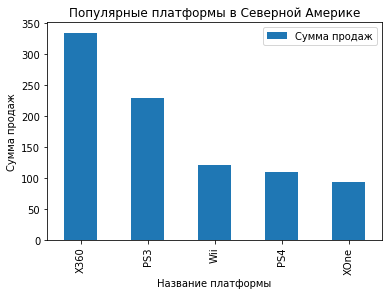

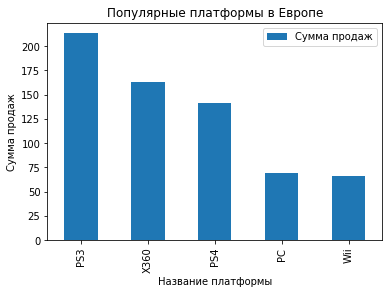

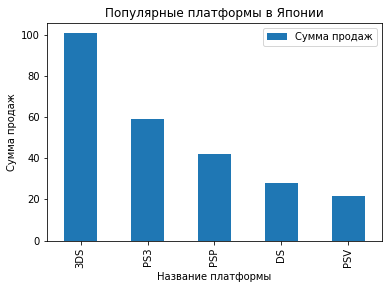

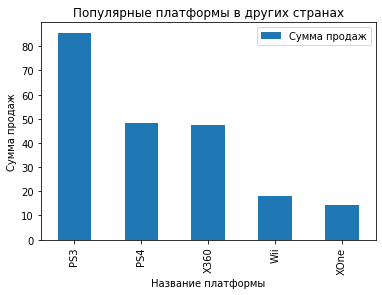

In [41]:
na_total.plot(kind='bar')
plt.title('Популярные платформы в Северной Америке')
plt.legend(['Сумма продаж'])
plt.xlabel('Название платформы')
plt.ylabel('Сумма продаж')

eu_total.plot(kind='bar')
plt.title('Популярные платформы в Европе')
plt.legend(['Сумма продаж'])
plt.xlabel('Название платформы')
plt.ylabel('Сумма продаж')

jp_total.plot(kind='bar')
plt.title('Популярные платформы в Японии')
plt.legend(['Сумма продаж'])
plt.xlabel('Название платформы')
plt.ylabel('Сумма продаж')

other_total.plot(kind='bar')
plt.title('Популярные платформы в других странах')
plt.legend(['Сумма продаж'])
plt.xlabel('Название платформы')
plt.ylabel('Сумма продаж')

PS4, PS3, X360, Wii - примерно одинаково популярны во всём мире. Совершенно иной набор популярных платформ в Японии.

Самые популярные жанры (топ-5) каждого региона (NA, EU, JP):

In [42]:
na_genre = total_data.pivot_table(index=['genre'], values=['na_sales'], aggfunc=['sum'])
na_genre.reset_index()
na_genre.columns = ['na_sales']
na_genre = na_genre.sort_values(by='na_sales', ascending=False).head(5)
na_genre

,na_sales
genre,
Action,290.64
Shooter,237.47
Sports,156.81
Misc,123.80
Role-Playing,112.05


In [43]:
eu_genre = total_data.pivot_table(index=['genre'], values=['eu_sales'], aggfunc=['sum'])
eu_genre.reset_index()
eu_genre.columns = ['eu_sales']
eu_genre = eu_genre.sort_values(by='eu_sales', ascending=False).head(5)
eu_genre

,eu_sales
genre,
Action,233.63
Shooter,171.45
Sports,116.84
Role-Playing,75.48
Misc,66.09


In [44]:
jp_genre = total_data.pivot_table(index=['genre'], values=['jp_sales'], aggfunc=['sum'])
jp_genre.reset_index()
jp_genre.columns = ['jp_sales']
jp_genre = jp_genre.sort_values(by='jp_sales', ascending=False).head(5)
jp_genre

,jp_sales
genre,
Role-Playing,103.54
Action,72.20
Misc,24.29
Platform,15.81
Adventure,15.67


In [45]:
other_genre = total_data.pivot_table(index=['genre'], values=['other_sales'], aggfunc=['sum'])
other_genre.reset_index()
other_genre.columns = ['other_sales']
other_genre = other_genre.sort_values(by='other_sales', ascending=False).head(5)
other_genre

,other_sales
genre,
Action,76.62
Shooter,56.78
Sports,39.23
Role-Playing,24.21
Misc,20.38


Text(0, 0.5, 'Сумма продаж')

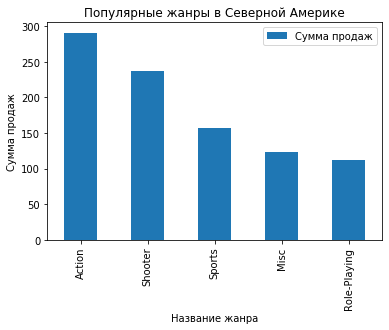

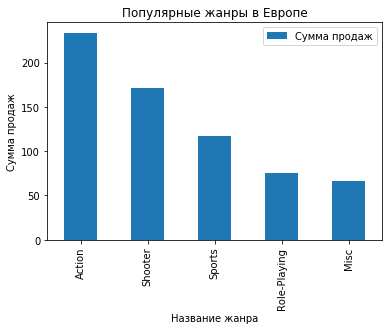

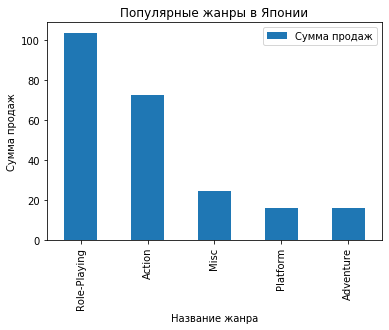

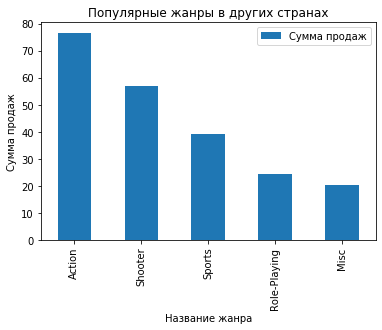

In [46]:
na_genre.plot(kind='bar')
plt.title('Популярные жанры в Северной Америке')
plt.legend(['Сумма продаж'])
plt.xlabel('Название жанра')
plt.ylabel('Сумма продаж')

eu_genre.plot(kind='bar')
plt.title('Популярные жанры в Европе')
plt.legend(['Сумма продаж'])
plt.xlabel('Название жанра')
plt.ylabel('Сумма продаж')

jp_genre.plot(kind='bar')
plt.title('Популярные жанры в Японии')
plt.legend(['Сумма продаж'])
plt.xlabel('Название жанра')
plt.ylabel('Сумма продаж')

other_genre.plot(kind='bar')
plt.title('Популярные жанры в других странах')
plt.legend(['Сумма продаж'])
plt.xlabel('Название жанра')
plt.ylabel('Сумма продаж')

Во всем мире популярны жанры: Action, Sports и Shooter. В Японии лидер - Role-Playing, а Shooter в лидерах не присутсвует.

Влияет ли рейтинг ESRB на продажи в отдельном регионе?

In [47]:
na_genre = total_data.pivot_table(index=['esrb_raiting'], values=['na_sales'], aggfunc=['sum'])
na_genre.reset_index()
na_genre.columns = ['na_sales']
na_genre = na_genre.sort_values(by='na_sales', ascending=False).head(5)
na_genre

,na_sales
esrb_raiting,
Для взрослых,382.22
Для всех,271.15
Подросткам от 13 лет,160.81
Для всех от 10 лет и старше,159.38
Рейтинг не определен,155.72


In [48]:
eu_genre = total_data.pivot_table(index=['esrb_raiting'], values=['eu_sales'], aggfunc=['sum'])
eu_genre.reset_index()
eu_genre.columns = ['eu_sales']
eu_genre = eu_genre.sort_values(by='eu_sales', ascending=False).head(5)
eu_genre

,eu_sales
esrb_raiting,
Для взрослых,292.04
Для всех,197.34
Рейтинг не определен,139.47
Подросткам от 13 лет,113.08
Для всех от 10 лет и старше,99.28


In [49]:
jp_genre = total_data.pivot_table(index=['esrb_raiting'], values=['jp_sales'], aggfunc=['sum'])
jp_genre.reset_index()
jp_genre.columns = ['jp_sales']
jp_genre = jp_genre.sort_values(by='jp_sales', ascending=False).head(5)
jp_genre

,jp_sales
esrb_raiting,
Рейтинг не определен,171.49
Для всех,47.87
Подросткам от 13 лет,42.11
Для взрослых,30.45
Для всех от 10 лет и старше,13.22


In [50]:
other_genre = total_data.pivot_table(index=['esrb_raiting'], values=['other_sales'], aggfunc=['sum'])
other_genre.reset_index()
other_genre.columns = ['other_sales']
other_genre = other_genre.sort_values(by='other_sales', ascending=False).head(5)
other_genre

,other_sales
esrb_raiting,
Для взрослых,96.98
Для всех,60.04
Рейтинг не определен,40.52
Подросткам от 13 лет,38.72
Для всех от 10 лет и старше,31.15


Игры с рейтингом 'Для взрослых' и 'Для всех' пользуются наибольшей популярностью во всем мире. В Японии никак не могут определиться с оценками игр.

## Проверка гипотез
<a id='cell5'></a>

1. Средние пользовательские рейтинги платформ Xbox One и PC одинаковые:
2. Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные:

Средние пользовательские рейтинги платформ Xbox One и PC одинаковые:
- Нулевая гипотеза - средние пользовательские рейтинги платформ Xbox One и PC одинаковые.
- Альтернативная гипотеза - средние пользовательские рейтинги платформ Xbox One и PC отличаются между собой.
- Критический уровень значимости - 0.05.

In [51]:
xbox_one = total_data[(total_data['platform'] == 'XOne') & (total_data['user_score'] >= 0)]['user_score']
pc = total_data[(total_data['platform'] == 'PC') & (total_data['user_score'] >= 0)]['user_score']

In [52]:
from scipy import stats as st
alpha = 0.05
results = st.ttest_ind(xbox_one, pc, equal_var = False)
print('P-value:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

P-value: 0.9801634129117883
Не получилось отвергнуть нулевую гипотезу


Проверка данных:

In [53]:
print('Средняя оценка платформы Xbox One:', round(xbox_one.mean(), 2))
print('Средняя оценка платформы PC:', round(pc.mean(), 2))

Средняя оценка платформы Xbox One: 6.52
Средняя оценка платформы PC: 6.52


**Вывод**

- Средние пользовательские рейтинги платформ Xbox One и PC одинаковые.


Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные:

- Нулевая гипотеза - средние пользовательские рейтинги жанров Action и Sports одинаковые.
- Альтернативная гипотеза - средние пользовательские рейтинги жанров Action и Sports отличаются между собой.
- Критический уровень значимости - 0.05.

In [54]:
action = total_data[(total_data['genre'] == 'Action') & (total_data['user_score'] >= 0)]['user_score']
sports = total_data[(total_data['genre'] == 'Sports') & (total_data['user_score'] >= 0)]['user_score']

In [55]:
from scipy import stats as st
alpha = 0.05
results = st.ttest_ind(action, sports, equal_var = False)
print('P-value:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

P-value: 1.4516152467844418e-15
Отвергаем нулевую гипотезу


Проверка данных:

In [56]:
print('Средний пользовательский рейтинг жанра Action:', round(action.mean(), 2))
print('Средний пользовательский рейтинг жанра Sports:', round(sports.mean(), 2))

Средний пользовательский рейтинг жанра Action: 6.78
Средний пользовательский рейтинг жанра Sports: 5.9


**Вывод**

- Средние пользовательские рейтинги жанра Action и жанра Sports различные.

## Общий вывод
<a id='cell6'></a>

Закономерности, определяющие успешность игры:

- Игры с рейтингом 'Для взрослых' и 'Для всех' пользуются наибольшей популярностью во всем мире.
- Во всем мире популярны жанры: Action, Sports и Shooter. 
- Самые популярные платформы: PS4, X360, PS3, XOne.
- Чем лучше пользовательская оценка и оценка критиков, тем больше объём продаж игры.

Поэтому, при планирование рекламной кампании, необходимо обращать внимание на жанр игры(желательно чтобы это был популярный жанр - Action, Sports и Shooter), игра должна быть совместима с популярными платформами(такие как РS, Xbox, Wii, PC), иметь рейтинг 'E': 'Для всех' и хорошие оценки пользователей и критиков.